# Tranning The Classifier on Real Data

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
[transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))])


In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True,num_workers=2)

In [5]:
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download = True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

Files already downloaded and verified


In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    print(npimg.shape)
    # Image comes in the shape of channel First 
    # Also the img[1] is height and img[2] is width
    plt.imshow(np.transpose(npimg, (1,2,0)))
#     print(' '.join('%5s' % class))
#     plt.imshow(npimg)

In [13]:
dataiter = iter(trainloader)

Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/bibek.joshi/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/bibek.joshi/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/bibek.joshi/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bibek.joshi/miniconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/Users/bibek.joshi/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bibek.joshi/miniconda3/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/Users/bibek.joshi/miniconda3/lib/python3.

(3, 36, 138)
 deer   cat truck   car


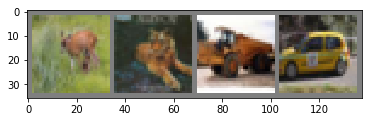

In [29]:
images,label = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[label[j]] for j in range(4)))

### Define the Network

In [52]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [53]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001,momentum=0.9)

In [73]:
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader, 0):
        inputs, labels = data # Get the inputs
        optimizer.zero_grad() # zero the gradients
        
        # Forward + Backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d,%5d] loss %3f' % (epoch+1,i+1,running_loss/2000))
            running_loss = 0.0
print('Finished Tranning')
    

[1, 2000] loss 0.597768
[1, 4000] loss 0.607912
[1, 6000] loss 0.677153
[1, 8000] loss 0.700294
[1,10000] loss 0.726725
[1,12000] loss 0.744666
[2, 2000] loss 0.621294
[2, 4000] loss 0.662359
[2, 6000] loss 0.679222
[2, 8000] loss 0.694668
[2,10000] loss 0.718870
[2,12000] loss 0.702601
Finished Tranning


(3, 36, 138)
GroundTruth:    cat  ship  ship plane


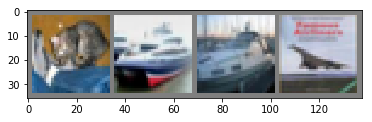

In [58]:
dataiter = iter(testloader)


(3, 36, 138)
GroundTruth:    dog horse  ship  frog
Predicted:    dog   cat  ship  frog


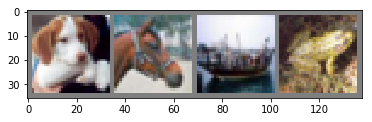

In [69]:
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [70]:
outputs

tensor([[-4.6095, -4.9798,  1.7059,  4.3246, -1.0376,  6.9152,  3.4611,  1.1337,
         -4.3127, -1.5366],
        [-0.8648, -2.9199, -0.7942,  1.9348,  1.2254,  1.4169,  0.3186,  1.5075,
         -2.3533,  0.3064],
        [ 6.5892,  2.4613, -1.7196, -0.2826, -2.5361, -6.2778, -0.5493, -7.9128,
         16.0163,  3.4673],
        [-0.1104,  3.2494, -0.7043,  0.4023,  1.1234,  2.6643, 10.1630, -5.3570,
         -5.1343, -0.4170]], grad_fn=<ThAddmmBackward>)

In [71]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [72]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 76 %
Accuracy of  bird : 30 %
Accuracy of   cat : 39 %
Accuracy of  deer : 46 %
Accuracy of   dog : 59 %
Accuracy of  frog : 68 %
Accuracy of horse : 68 %
Accuracy of  ship : 71 %
Accuracy of truck : 76 %
